<a href="https://colab.research.google.com/github/tproffen/ORCSGirlsPython/blob/master/TextMining/Activity%205%20--%20Sentiment%20Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://github.com/tproffen/ORCSGirlsPython/blob/master/TextMining/Images/PoweredTechGirlz.png?raw=1" width="15%" align="right">

# Activity 5: Text Mining Harry Potter - Sentiment Analysis

We will be using data provided by [Bradley Boehmke](https://github.com/bradleyboehmke/harrypotter).

The goal of this class is to do a textual analysis of the seven Harry Potter books. We will use Python to discover some interesting insights that maybe nobody else in the world has realized about the Harry Potter books!

These are the books we will be analyzing:

1. Harry Potter and the Sorcerer's Stone
2. Harry Potter and the Chamber of Secrets
3. Harry Potter and the Prisoner of Azkaban
4. Harry Potter and the Goblet of Fire
5. Harry Potter and the Order of the Phoenix
6. Harry Potter and the Half-Blood Prince
7. Harry Potter and the Deathly Hallows

<img src="https://github.com/tproffen/ORCSGirlsPython/blob/master/TextMining/Images/book_covers.png?raw=1" width="60%" align="left">

Don't forget to import the helper functions below.

In [0]:
!curl -s -o setup.sh https://raw.githubusercontent.com/tproffen/ORCSGirlsPython/master/TextMining/Helpers/setup_activity5.sh
!bash setup.sh

In [0]:
%load_ext autoreload

%autoreload 2

import Helpers
from Helpers.load_data import *
from Helpers.plot_data import *
from collections import Counter
import nltknltk.download('punkt')

## Sentiment analysis

We talked about how sentiment analysis is done using machine learning. Fortunately for us, others have created libraries in Python which already contain ready to use machine learning models for sentiment detection. The library we will be using is called [VADER](https://github.com/cjhutto/vaderSentiment).

Let's first create a list of sentences to test sentiment analysis on.

In [0]:
sentences = [
    "Our Saturday classes and fun and super interesting!",
    "Make sure you :) or :D today!",
    "The book was great, I enjoyed it very much.",
    "At least it isn't a horrible book.",
    "I got a very bad grade on my homework.",
    "Today is a really terrible day :("
]

Now, let's use VADER to get sentiment of these sentences.

In [0]:
# this imports the library we need
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# this line just creates a sentiment model
sentiment_model = SentimentIntensityAnalyzer()

# now we will iterate over all sentences and get their sentiment
for sentence in sentences:
    
    # get sentiment
    scores = sentiment_model.polarity_scores(sentence)
    
    # print the sentence and sentiment
    print(sentence)
    
    # the {: <15} characters just tell python to add spaces between columns
    print("negative: {: <15} neutral: {: <15} positive: {: <15} compound: {}\n".format(
        scores['neg'], scores['neu'], scores['pos'], scores['compound']
    ))

That's it! We have just applied a machine learning model to text and had it predict sentiment.

What if you change some words or add negation?

Try to add some of your own sentences to this list.

## Sentiment of Book 1

Now that we know how to get sentiment of sentences. What if we want to apply the model to a whole book? We will need to load the book and split it to sentences.

We already know how to load a book.

In [0]:
!curl -o Data/chapters.json https://raw.githubusercontent.com/tproffen/ORCSGirlsPython/master/TextMining/Data/chapters.json

In [0]:
book_1 = load_book_1()

# print the first 500 characters of book 1
print(book_1[0:500])

For this exercise, we would like to know what's the sentiment of each chapter.

We prepared a helper function that splits the book into chapters. The function returns two lists:
* A list of chapters found in book 1
* A list of chapter names (so that we can create a pretty plot:)

In [0]:
book_1_chapters, book_1_chapter_names = load_book_1_chapters()

In [0]:
# how many chapters are there?
print(len(book_1_chapters))

# print the chapter names
print(book_1_chapter_names)

In [0]:
print(book_1_chapters[16][0:500])

Now we need to split each chapter into sentences. Fortunately, as with many things in Python, there is a handy library that we can use to do that :) The library is called NLTK.

NLTK has a function `sent_tokenize` which works like this:

In [0]:
# import NLTK, a library for text mining in Python
from nltk import sent_tokenize

# let's get sentences from the first chapter
# remember that Python indexes lists from 0, so the first chapter has index 0
sentences = sent_tokenize(book_1_chapters[0])

Can you print the first 10 sentences?

In [0]:
# add your code to print the first 10 sentences from the first chapter

We already know how to get sentiment of sentences. Let's print the sentiment of the first 5 sentences from chapter 1.

In [0]:
sentiment_model = SentimentIntensityAnalyzer()

for sentence in sentences[0:5]:
    
    scores = sentiment_model.polarity_scores(sentence)
    
    print(sentence)
    
    print("negative: {: <15} neutral: {: <15} positive: {: <15} compound: {}\n".format(
        scores['neg'], scores['neu'], scores['pos'], scores['compound']
    ))

What if we want to know whare are the most positive and negative sentences in a chapter? We can save scores for all sentences into a list and then sort them. We prepared a code to do that.

In [0]:
all_scores = []

for sentence in sentences:
    
    scores = sentiment_model.polarity_scores(sentence)
    
    all_scores.append([sentence, scores])

Let's print the top 10 most positive sentences from chapter 1.

In [0]:
for sentence, scores in sorted(all_scores, key=lambda x: x[1]['pos'], reverse=True)[:10]:
    print(sentence)
    
    print("negative: {: <15} neutral: {: <15} positive: {: <15} compound: {}\n".format(
        scores['neg'], scores['neu'], scores['pos'], scores['compound']
    ))

Now let's print the top 10 negative sentences from chapter 1.

In [0]:
for sentence, scores in sorted(all_scores, key=lambda x: x[1]['neg'], reverse=True)[:10]:
    print(sentence)
    
    print("negative: {: <15} neutral: {: <15} positive: {: <15} compound: {}\n".format(
        scores['neg'], scores['neu'], scores['pos'], scores['compound']
    ))

Now that we know how to get sentiment of sentences, let's find sentiment of each chapter in the book and create a plot!

We will do the following:
    
* Split each chapter in book 1 into sentences
* Get compound sentiment score of each sentence
* Calculate the sentiment score of a chapter as the **average value of sentiment of all sentences**

In [0]:
# let's store sentiment scores for each chapter in a list
chapter_scores = []

for chapter in book_1_chapters:
    
    sentences = sent_tokenize(chapter)
    
    # to calculate average score, we will first store scores for all sentences
    all_scores = []    
    for sentence in sentences:
        scores = sentiment_model.polarity_scores(sentence)
        compound_score = scores['compound']
        all_scores.append(compound_score)

    # average is calculated as sum of all scores divided by number of scores
    chapter_score = sum(all_scores) / len(all_scores)
    chapter_scores.append(chapter_score)

Let's print the scores along with names of each chapter.

In [0]:
list(zip(book_1_chapter_names, chapter_scores))

We prepared a helper function that you can use to plot the scores.

In [0]:
plot_book_scores(book_1_chapter_names, chapter_scores)

Are the scores what you would expect?

## Sentiment of all books

Let's try to do the same for all books.

We prepared a helper function for loading all chapters.

In [0]:
all_chapters, all_names = load_all_chapters()

In [0]:
all_chapter_scores = []

for book_number, book_chapters in enumerate(all_chapters):
    
    chapter_scores = []
    
    for chapter_number, chapter in enumerate(book_chapters):
    
        sentences = sent_tokenize(chapter)

        all_scores = []    
        for sentence in sentences:
            scores = sentiment_model.polarity_scores(sentence)
            compound_score = scores['compound']
            all_scores.append(compound_score)

        # average is calculated as sum of all scores divided by number of scores
        chapter_score = sum(all_scores) / len(all_scores)
        chapter_scores.append(chapter_score)
        
    all_chapter_scores.append(chapter_scores)

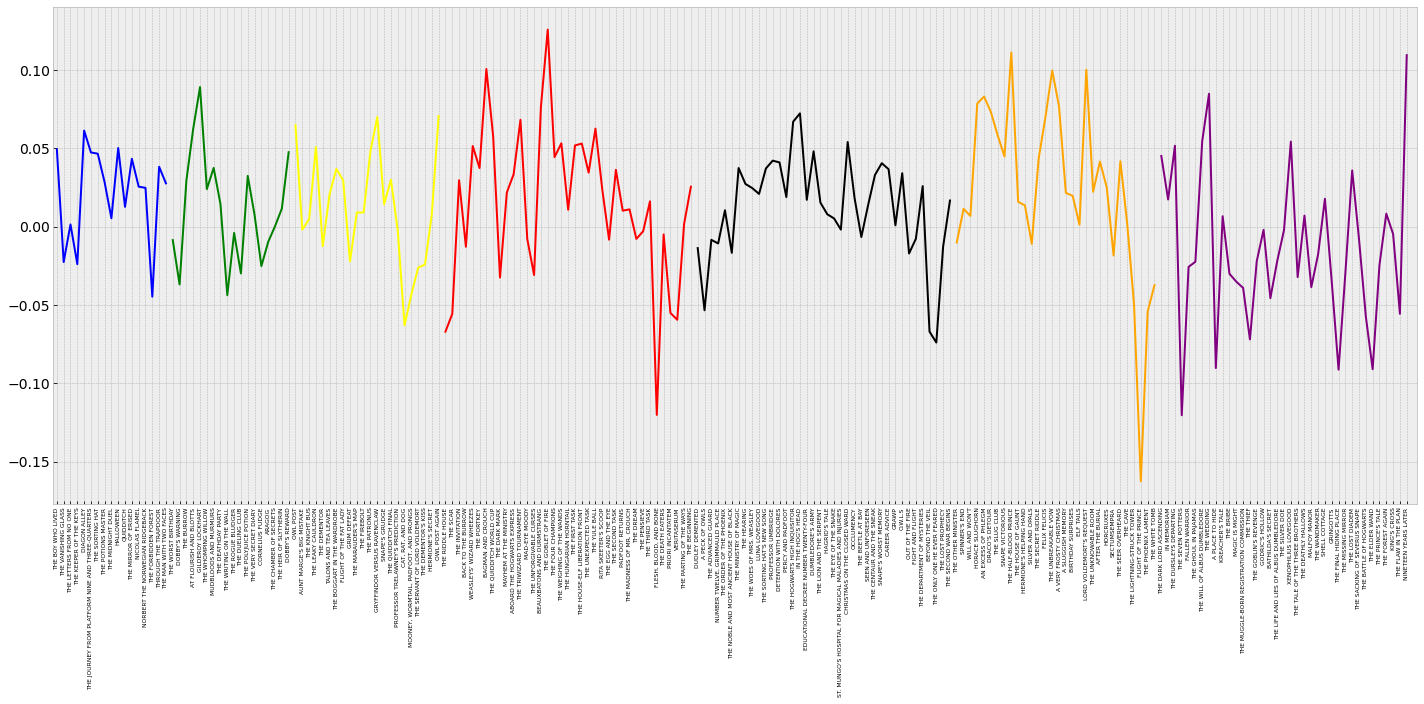

In [21]:
plot_all_book_scores(all_names, all_chapter_scores)